https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

# Load train and test data

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from  sklearn.model_selection import KFold

In [252]:
data_test = pd.read_csv(r"data\test.csv")
data_train = pd.read_csv(r"data\train.csv")

In [255]:
"""data_train['RealName'] = None
data_train['prefix'] = None
data_train['last_name'] = None
data_train['first_name'] = None
data_train['middle_name'] = None
data_train['husbands_last_name'] = None
data_train['2nd_name'] = None
data_train['3rd_name'] = None

data_train['lrealname'] = None
#data_train['prefix'] = None
data_train['llast_name'] = None
data_train['lfirst_name'] = None
data_train['lmiddle_name'] = None
data_train['lhusbands_last_name'] = None
data_train['l2nd_name'] = None
data_train['l3rd_name'] = None

data_train['nlrealname'] = None
#data_train['prefix'] = None
data_train['nllast_name'] = None
data_train['nlfirst_name'] = None
data_train['nlmiddle_name'] = None
data_train['nlhusbands_last_name'] = None
data_train['nl2nd_name'] = None
data_train['nl3rd_name'] = None"""

In [2]:
def get_real_name(df):
    for i in range(len(df.Name)):
        x = df.Name.loc[i].find("(")
        z = df.Name.loc[i].find(")")
        y = df.Name.loc[i].find('"') 
        if x > 0 and y < 0:
            df['RealName'][i] = df.Name.loc[i][x+1:z]
            #print(data_test['RealName'][i])
            """if data_test['Real Name'][i] == "Frances":
                print(i)"""
        else:
            df['RealName'][i] = df['Name'][i]
    return df
#get_real_name(data_train)

In [3]:
def parse_name(df):
    for i in range(len(df.Name)):
        comma_split = df.Name.loc[i].split(",")
        x = df.Name.loc[i].split(" ")
        y = df.Name.loc[i].find(".")

        df['last_name'][i] =  comma_split[0]
        df['husbands_last_name'][i] =  None

        df['first_name'][i] = x[2]
        if len(x) > 3:
            df['middle_name'][i] = x[3]
        else:
            df['middle_name'][i] = None
        df['prefix'][i] =  x[1]
    ################################# above parses mens names
        if df['RealName'][i] != df['Name'][i]:
            df['husbands_last_name'][i] =  comma_split[0]
            x = df.RealName.loc[i].split(" ")
            df['first_name'][i] = x[0]         
            num_of_names = len(x)

            if num_of_names == 2:
                df['last_name'][i] = x[-1]         
            elif num_of_names == 3: 
                df['last_name'][i] = x[-1]
                df['middle_name'][i] = x[1]  
            elif num_of_names == 1:
                #print("I just have a first name "+str(i))
                two = 1+1
            else:
                #print(i)
                df['middle_name'][i] = x[1] +" " +x[2]  
                df['2nd_name'][i] = x[1]
                df['3rd_name'][i] = x[2]
                df['last_name'][i] = x[-1]
    return df
#parse_name(get_real_name(data_train))[['RealName', 'prefix', 'first_name', 'middle_name', 'last_name']]

In [67]:
def names_encode(df):
    for i in range(len(df.Name)):
        df['lrealname'][i] = len(df['RealName'][i])        
        df['llast_name'][i] = len(df['last_name'][i])
        df['lfirst_name'][i] = len(df['first_name'][i])
        try:
            df['lmiddle_name'][i] = len(df['middle_name'][i])
            df['lhusbands_last_name'][i] = len(df['husbands_last_name'][i])
            df['l2nd_name'][i] = len(df['2nd_name'][i])
            df['l3rd_name'][i] = len(df['3rd_name'][i])
        except:
            pass

    m = df.max()
    ml = m.llast_name
    mr = m.lrealname
    mf = m.lfirst_name
    mm = m.lmiddle_name
    mh = m.lhusbands_last_name
    m2 = m.l2nd_name
    m3 = m.l3rd_name
    #print(m)
    
    for i in range(len(df.Name)):    
        try:
            df['nlrealname'][i] = df['lrealname'][i]/mr        
            df['nllast_name'][i] = df['llast_name'][i]/ml
            df['nlfirst_name'][i] = df['lfirst_name'][i]/mf
            df['nlmiddle_name'][i] = df['lmiddle_name'][i]/mm
            df['nlhusbands_last_name'][i] = df['lhusbands_last_name'][i]/mh
            df['nl2nd_name'][i] = df['l2nd_name'][i]/m2
            df['nl3rd_name'][i] = df['l3rd_name'][i]/m3
        except:
            pass
            #print(df.loc[i])
    return(df)
#t = parse_name(get_real_name(data_train))#[['RealName', 'prefix', 'first_name', 'middle_name', 'last_name']]
#names_encode(t)

In [68]:
def name_transforms(df):
    df['RealName'] = None
    df['prefix'] = None
    df['last_name'] = None
    df['first_name'] = None
    df['middle_name'] = None
    df['husbands_last_name'] = None
    df['2nd_name'] = None
    df['3rd_name'] = None

    df['lrealname'] = None
    #df['lprefix'] = None
    df['llast_name'] = None
    df['lfirst_name'] = None
    df['lmiddle_name'] = None
    df['lhusbands_last_name'] = None
    df['l2nd_name'] = None
    df['l3rd_name'] = None

    df['nlrealname'] = None
    #df['nlprefix'] = None
    df['nllast_name'] = None
    df['nlfirst_name'] = None
    df['nlmiddle_name'] = None
    df['nlhusbands_last_name'] = None
    df['nl2nd_name'] = None
    df['nl3rd_name'] = None
    df = get_real_name(df)
    df = parse_name(df)#[['RealName', 'prefix', 'first_name', 'middle_name', 'last_name']]
    df = names_encode(df)
    return df

t_train = name_transforms(data_train)
t_test = name_transforms(data_test)

In [69]:
t_train.max()
t_train.min()

PassengerId                               1
Survived                                  0
Pclass                                    1
Name                    Abbing, Mr. Anthony
Sex                                  female
Age                                   Adult
SibSp                                     0
Parch                                     0
Ticket                               110152
Fare                             1_quartile
Cabin                                     A
RealName                Abbing, Mr. Anthony
prefix                            Billiard,
last_name                            Abbing
first_name                          Achille
lrealname                                 4
llast_name                                1
lfirst_name                               3
lmiddle_name                              1
lhusbands_last_name                       3
l2nd_name                                 4
l3rd_name                                 5
nlrealname                      

# Visualize the data

In [6]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)

NameError: name 'data_train' is not defined

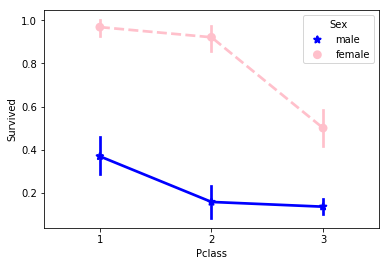

In [8]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

# Transformations

In [51]:
data_test0 = pd.read_csv(r"data\test.csv")
data_train0 = pd.read_csv(r"data\train.csv")

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    #df = drop_features(df)
    return df

data_train0 = transform_features(data_train0)
data_test0 = transform_features(data_test0)
data_train0.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex          Age  \
0                            Braund, Mr. Owen Harris    male      Student   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female        Adult   
2                             Heikkinen, Miss. Laina  female  Young Adult   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  Young Adult   
4                           Allen, Mr. William Henry    male  Young Adult   

   SibSp  Parch            Ticket        Fare Cabin Embarked       Lname  \
0      1      0         A/5 21171  1_quartile     N        S     Braund,   
1      1      0          PC 17599  4_quartile     C        C    Cumings,   
2      0      0  STON/O2. 3101282  1_quartile     N        S  Heikkinen,   
3      1      0            113803  4_quartile     C        S   Futrelle,   
4      0      0            373450  2_quartile     N        S      Allen,   

  NamePrefix  
0        Mr.  
1       Mrs.  
2      Miss.  
3       Mrs.  
4        Mr.

In [73]:
def load_transform_data():
    data_test = pd.read_csv(r"data\test.csv")
    data_train = pd.read_csv(r"data\train.csv")
    
    transformed_test = name_transforms(data_test)
    transformed_train = name_transforms(data_train)
    #print(transformed_train.columns)
    df_test = transform_features(transformed_test)
    df_train = transform_features(transformed_train)
    #print(df_train.columns)
    return df_test,df_train

data_test,data_train = load_transform_data()

In [238]:
transformed_train['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'RealName', 'prefix',
       'last_name', 'first_name', 'middle_name', 'husbands_last_name',
       '2nd_name', '3rd_name', 'lrealname', 'llast_name', 'lfirst_name',
       'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
       'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
       'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name']

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'RealName', 'prefix',
       'last_name', 'first_name', 'middle_name', 'husbands_last_name',
       '2nd_name', '3rd_name', 'lrealname', 'llast_name', 'lfirst_name',
       'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
       'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
       'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name'],
      dtype='object')

In [40]:
def nanFixer(df):
    """'lrealname', 'llast_name', 'lfirst_name',
       'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
       'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
       'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name'"""
    df.replace("None", np.nan, inplace=True)

    df.lrealname = df.lrealname.fillna(0)
    df.llast_name = df.llast_name.fillna(0)
    df.lfirst_name = df.lfirst_name.fillna(0)
    df.lmiddle_name = df.lmiddle_name.fillna(0)
    df.lhusbands_last_name = df.lhusbands_last_name.fillna(0)
    df.l2nd_name = df.l2nd_name.fillna(0)
    df.l3rd_name = df.l3rd_name.fillna(0)

    df.nlrealname = df.nlrealname.fillna(0)
    df.nllast_name = df.nllast_name.fillna(0)
    df.nlfirst_name = df.nlfirst_name.fillna(0)
    df.nlmiddle_name = df.nlmiddle_name.fillna(0)
    df.nlhusbands_last_name = df.nlhusbands_last_name.fillna(0)
    df.nl2nd_name = df.nl2nd_name.fillna(0)
    df.nl3rd_name = df.nl3rd_name.fillna(0)
    
    df.last_name = df.last_name.fillna('NA')
    df.prefix = df.prefix.fillna('NA')
    #df.Fare = df.Fare.fillna(-0.5)
    #df.Age = df.Age.fillna(-0.5)
    
    return df

In [52]:
def drop_features(df, feat):
    return df.drop(feat, axis=1)

In [85]:
def encode(df_train, df_test):#, features=None):
    #features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    #'Ticket','Embarked', 'RealName', 
    df_train = nanFixer(df_train)
    df_test = nanFixer(df_test)

    features = [
            'Fare', 'Cabin', 'Age', 'Sex','last_name','prefix',
            'lrealname', 'llast_name', 'lfirst_name',
            'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
            'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
            'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name']
    drop = ['Pclass',  'SibSp','Parch', 'Embarked',
            'RealName', 'first_name', 'middle_name', 'husbands_last_name', '2nd_name', '3rd_name', 'Name',
            'Lname', 'NamePrefix', 'Ticket']
    
    df_train = drop_features(df_train, drop)
    df_test = drop_features(df_test, drop)
    
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()

        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
encoded_train, encoded_test = encode(data_train, data_test)
print(encoded_train.max())
encoded_train.min()

PassengerId             891
Survived                  1
Sex                       1
Age                       7
Fare                      4
Cabin                     8
prefix                   33
last_name               960
lrealname                50
llast_name               18
lfirst_name               9
lmiddle_name             13
lhusbands_last_name      14
l2nd_name                 4
l3rd_name                 3
nlrealname               89
nllast_name              30
nlfirst_name             17
nlmiddle_name            26
nlhusbands_last_name     19
nl2nd_name                8
nl3rd_name                6
dtype: int64


PassengerId             1
Survived                0
Sex                     0
Age                     0
Fare                    0
Cabin                   0
prefix                  0
last_name               0
lrealname               0
llast_name              0
lfirst_name             0
lmiddle_name            0
lhusbands_last_name     0
l2nd_name               0
l3rd_name               0
nlrealname              0
nllast_name             0
nlfirst_name            0
nlmiddle_name           0
nlhusbands_last_name    0
nl2nd_name              0
nl3rd_name              0
dtype: int64

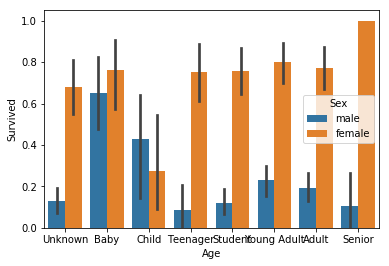

In [172]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train)


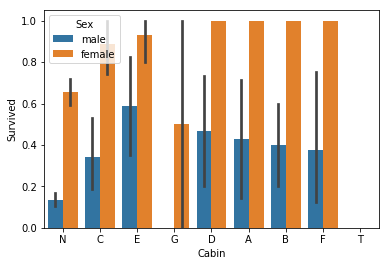

In [173]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train)

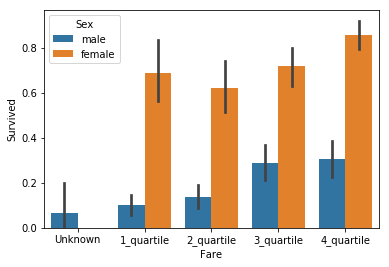

In [174]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train)


# Encoding

In [246]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'RealName', 'prefix',
       'last_name', 'first_name', 'middle_name', 'husbands_last_name',
       '2nd_name', '3rd_name', 'lrealname', 'llast_name', 'lfirst_name',
       'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
       'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
       'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name'],
      dtype='object')

In [14]:
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
#data_train, data_test = encode_features(data_train, data_test)
#data_train.head()
encode_features(data_train0, data_test0)[0].iloc[0]

PassengerId      1
Survived         0
Pclass           3
Sex              1
Age              4
SibSp            1
Parch            0
Fare             0
Cabin            7
Lname          100
NamePrefix      19
Name: 0, dtype: int64

In [241]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'RealName', 'prefix',
       'last_name', 'first_name', 'middle_name', 'husbands_last_name',
       '2nd_name', '3rd_name', 'lrealname', 'llast_name', 'lfirst_name',
       'lmiddle_name', 'lhusbands_last_name', 'l2nd_name', 'l3rd_name',
       'nlrealname', 'nllast_name', 'nlfirst_name', 'nlmiddle_name',
       'nlhusbands_last_name', 'nl2nd_name', 'nl3rd_name']
transformed_train.iloc[0]

PassengerId                                   1
Survived                                      0
Pclass                                        3
Name                    Braund, Mr. Owen Harris
Sex                                        male
Age                                          22
SibSp                                         1
Parch                                         0
Ticket                                A/5 21171
Fare                                       7.25
Cabin                                       NaN
Embarked                                      S
RealName                Braund, Mr. Owen Harris
prefix                                      Mr.
last_name                                Braund
first_name                                 Owen
middle_name                              Harris
husbands_last_name                         None
2nd_name                                   None
3rd_name                                   None
lrealname                               

In [86]:
encoded_train.iloc[0]

PassengerId               1
Survived                  0
Sex                       1
Age                       4
Fare                      0
Cabin                     7
prefix                   19
last_name               111
lrealname                19
llast_name                4
lfirst_name               1
lmiddle_name              6
lhusbands_last_name       0
l2nd_name                 0
l3rd_name                 0
nlrealname               31
nllast_name               7
nlfirst_name              2
nlmiddle_name            13
nlhusbands_last_name      0
nl2nd_name                0
nl3rd_name                0
Name: 0, dtype: int64

# Split train/test

In [101]:
def split(train):
    X_all = train.drop(['Survived', 'PassengerId'], axis=1)
    y_all = train['Survived']

    num_test = 0.20
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)
    return X_train, X_test, y_train, y_test, X_all, y_all

In [102]:
X_train, X_test, y_train, y_test, X_all, y_all = split(encoded_train)

In [89]:
X_train.iloc[0]

Sex                       0
Age                       4
Fare                      3
Cabin                     2
prefix                   20
last_name               912
lrealname                 8
llast_name                4
lfirst_name               2
lmiddle_name              6
lhusbands_last_name       3
l2nd_name                 0
l3rd_name                 0
nlrealname               11
nllast_name               7
nlfirst_name              4
nlmiddle_name            13
nlhusbands_last_name      3
nl2nd_name                0
nl3rd_name                0
Name: 151, dtype: int64

# Tuning

In [103]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.770949720670391


# Validate with KFold

In [184]:
from sklearn.cross_validation import KFold

"""def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)"""

C:\Users\kurtb\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'def run_kfold(clf):\n    kf = KFold(891, n_folds=10)\n    outcomes = []\n    fold = 0\n    for train_index, test_index in kf:\n        fold += 1\n        X_train, X_test = X_all.values[train_index], X_all.values[test_index]\n        y_train, y_test = y_all.values[train_index], y_all.values[test_index]\n        clf.fit(X_train, y_train)\n        predictions = clf.predict(X_test)\n        accuracy = accuracy_score(y_test, predictions)\n        outcomes.append(accuracy)\n        print("Fold {0} accuracy: {1}".format(fold, accuracy))     \n    mean_outcome = np.mean(outcomes)\n    print("Mean Accuracy: {0}".format(mean_outcome)) \n\nrun_kfold(clf)'

In [105]:
folds = KFold(n_splits=10)
accuracy_list = []  # Empty list for tracking scores on each iteration
for train_i, test_i in folds.split(X_all, y_all):  # Loop through all splits
   x_train, x_test = X_all.loc[train_i], X_all.loc[test_i]
   y_train, y_test = y_all.loc[train_i], y_all.loc[test_i]
   clf.fit(x_train, y_train)
   predict = clf.predict(x_test)
   accuracy = accuracy_score(y_test, predict)
   accuracy_list.append(accuracy)

print(np.mean(accuracy_list))

0.7923470661672909


# Predict the Actual Test Data

In [107]:
data_test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [ ]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

In [109]:
ids = data_test['PassengerId']
predictions = clf.predict(encoded_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1